In [10]:
import sys

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
sys.path.insert(0, "/Users/bbeidel/git/nn-food-classifier")
sys.path.insert(0, "/Users/bbeidel/git/nn-food-classifier/src")

In [12]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [13]:
from src.data.make_dataset import get_train_data, get_test_data

In [14]:
X_train, Y_train, classes = get_train_data()

In [15]:
X_train.shape

(10099, 32, 32, 3)

In [16]:
Y_train.shape

(10099, 101)

In [17]:
X_test, Y_test, classes = get_test_data()

In [18]:
X_test.shape

(1000, 32, 32, 3)

In [19]:
Y_train.shape

(10099, 101)

In [20]:
X_train = X_train / 255.
X_test  = X_test / 255.

In [21]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_images(n_images, X, Y, classes):
    plt.figure(figsize=(10,10))
    for i in range(n_images):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        label_assignment = Y_train[i]
        label_name = classes[label_assignment].item().decode("utf-8")
        plt.xlabel(label_name)
    plt.show()

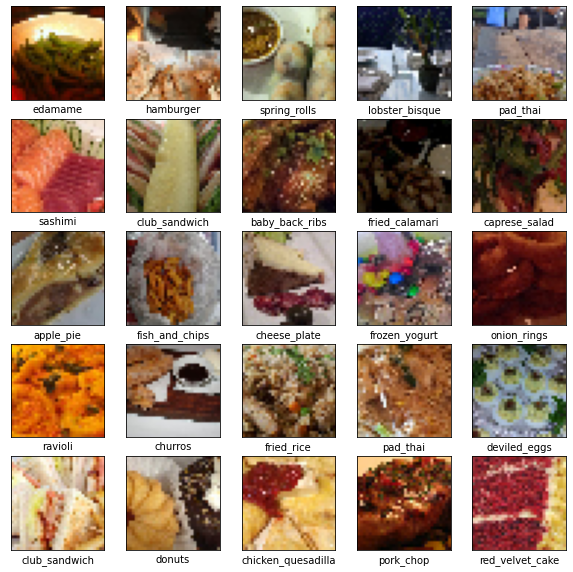

In [22]:
plot_images(25, X_train, Y_train, classes)

In [23]:
IMG_SIZE    = 32
NB_CHANNELS = 3
BATCH_SIZE  = 16

In [24]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, 
               kernel_size=(2,2), 
               strides=(1,1),
               padding='same',
               input_shape=(IMG_SIZE,IMG_SIZE,NB_CHANNELS),
               data_format='channels_last'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))
cnn.add(Conv2D(filters=64,
               kernel_size=(2,2),
               strides=(1,1),
               padding='valid'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))
cnn.add(Flatten())        
cnn.add(Dense(64))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(101, activation='softmax'))
cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [25]:
cnn.fit(x=X_train, y=Y_train, batch_size=32, epochs=25, verbose=1, shuffle=True)

Epoch 1/25
10099/10099 [==============================] - 5s 468us/step - loss: 0.0551 - accuracy: 0.9901
Epoch 2/25
10099/10099 [==============================] - 4s 441us/step - loss: 0.0537 - accuracy: 0.9901
Epoch 3/25
10099/10099 [==============================] - 5s 496us/step - loss: 0.0527 - accuracy: 0.9901
Epoch 4/25
10099/10099 [==============================] - 5s 470us/step - loss: 0.0517 - accuracy: 0.9901
Epoch 5/25
10099/10099 [==============================] - 5s 476us/step - loss: 0.0510 - accuracy: 0.9901
Epoch 6/25
10099/10099 [==============================] - 6s 560us/step - loss: 0.0502 - accuracy: 0.9901
Epoch 7/25
10099/10099 [==============================] - 6s 545us/step - loss: 0.0494 - accuracy: 0.9901
Epoch 8/25
10099/10099 [==============================] - 6s 554us/step - loss: 0.0487 - accuracy: 0.9902
Epoch 9/25
10099/10099 [==============================] - 6s 558us/step - loss: 0.0478 - accuracy: 0.9902
Epoch 10/25
10099/10099 [=====================

In [26]:
score, accuracy = cnn.evaluate(X_test, Y_test)

1000/1000 [==============================] - 0s 114us/step


In [27]:
accuracy

0.9892773032188416